## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [ ]:
import numpy as np
import pandas as pd
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("E:/Data/bigmart_train.csv")

In [ ]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Exploratory Data Analysis (EDA)

1. Univariate analysis on 
    * Target variable - Item outlet sales (histogram)

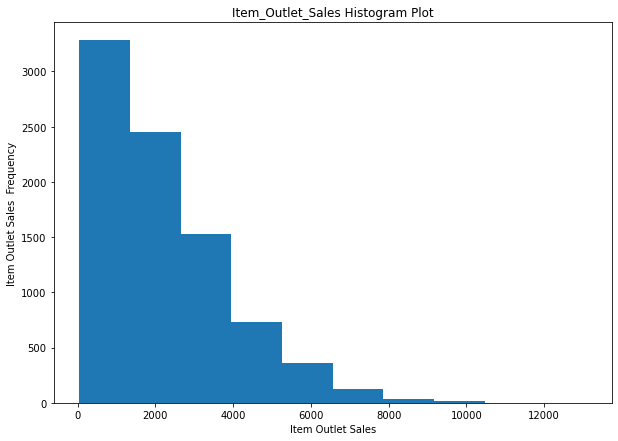

In [ ]:
plt.figure(figsize = (10,7))
plt.hist(train['Item_Outlet_Sales'])
plt.title("Item_Outlet_Sales Histogram Plot")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Item Outlet Sales  Frequency")
plt.show()

#### Correlation Matrix

In [ ]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

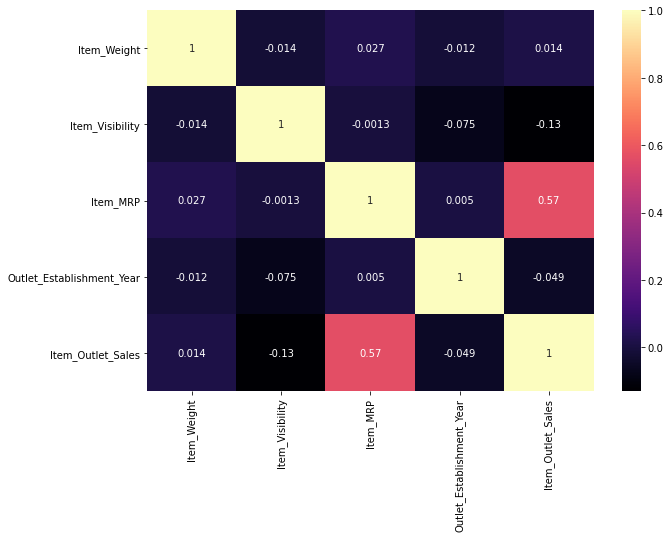

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(train.corr(), annot = True, cmap = 'magma')

In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [ ]:
train['Outlet_Age'] = 2018 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [ ]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# mode of Outlet Size
train['Outlet_Size'].mode()[0]

'Medium'

In [ ]:
# Fill the Null values for outlet size with Medium
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [ ]:
train['Item_Weight'].mean()

12.857645184136183

In [ ]:
# fill the na for item weight with the mean of weights
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

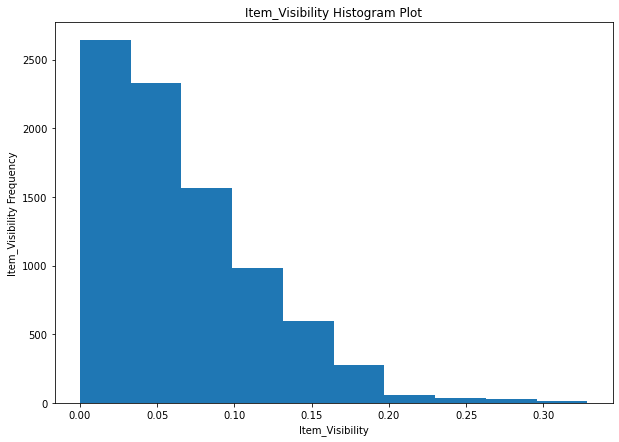

In [ ]:
plt.figure(figsize = (10,7))
plt.hist(train['Item_Visibility'])
plt.title("Item_Visibility Histogram Plot")
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Visibility Frequency")
plt.show()

<AxesSubplot:xlabel='Item_Visibility'>

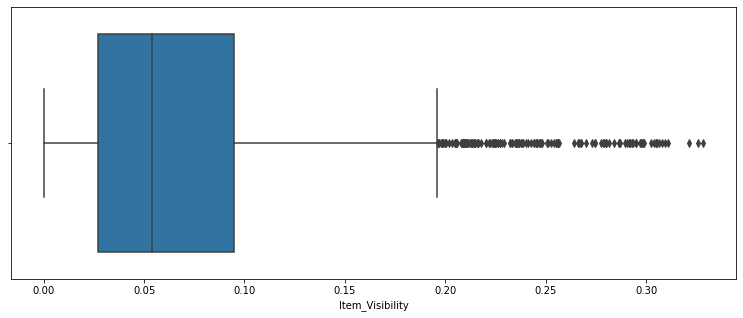

In [ ]:
plt.figure(figsize = (13,5))
sns.boxplot( x = train['Item_Visibility'])

In [ ]:
# Delete the Outliers observations from Item Visibility
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
print(Q1)
print(Q3)

0.026989477499999998
0.0945852925


In [ ]:
# Inter Quartile Range
IQR = Q3 - Q1
filt_train = train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [ ]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [ ]:
train = filt_train
train.shape

(8379, 13)

In [ ]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.061425      2
0.074779      2
0.073562      2
           ... 
0.146896      1
0.081119      1
0.122735      1
0.100641      1
0.027617      1
Name: Item_Visibility, Length: 7736, dtype: int64

In [ ]:
train['Item_Visibility'].sort_values().unique()

array([0.        , 0.0035747 , 0.0035891 , ..., 0.19506823, 0.1956888 ,
       0.19572112])

In [ ]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz','Viz','High Viz'])

In [ ]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [ ]:
train.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Outlet_Age                     0
Item_Visibility_bins         526
dtype: int64

In [ ]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].fillna('Low Viz')

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
Item_Visibility_bins         0
dtype: int64

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,Low Viz


In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

#### Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
# First train & then apply changes using transform
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [ ]:
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [ ]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [ ]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [ ]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
dummy = pd.get_dummies(train['Outlet_Type'])
dummy

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [ ]:
# axis = 1 ; column wise 
train = pd.concat([train, dummy], axis = 1)

In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [ ]:
# got to drop all the object types features
train = train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

#### Linear Regression

In [ ]:
# build the linear regression model
X = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

In [ ]:
test = pd.read_csv('E:/Data/bigmart_test.csv')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [ ]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [ ]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low Viz')
test['Item_Visibility_bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_bins, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [ ]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [ ]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [ ]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [ ]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [ ]:
test['Outlet_Age'] = 2018 - test['Outlet_Establishment_Year']

In [ ]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test, dummy], axis=1)

In [ ]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [ ]:
X_test.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Item_Visibility_bins      int32
Outlet_Age                int64
Grocery Store             uint8
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.3, random_state = 6)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# R2 Value
lin_reg.score(xtest,ytest)

0.5637181702776216

In [ ]:
# coefficient of features
lin_reg.coef_

array([ 2.66385593e+00,  6.42831033e+01, -5.70348430e+02,  1.57828588e+01,
        6.00260570e+01,  3.71060062e+01, -1.70579519e+00,  3.71193785e+01,
       -1.74053478e+03,  2.53294435e+02, -1.43295504e+02,  1.63053585e+03])

In [ ]:
lin_reg.intercept_

-296.0314873747152

#### Regression Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
predictions = lin_reg.predict(xtest)

In [ ]:
# RMSE
np.sqrt(mean_squared_error(ytest, predictions))

1100.8592669753646

In [ ]:
# MAE
mean_absolute_error(ytest, predictions)

819.6976352914753

In [ ]:
r2_score(ytest, predictions)

0.5637181702776216

#### L2 Regularization (Squared Magnitude)

In [ ]:
from sklearn.linear_model import Ridge
# alpha = 0.00001 - 0.1
ridgeReg = Ridge(alpha = 0.001, normalize=True)
ridgeReg.fit(xtrain, ytrain) 

Ridge(alpha=0.001, normalize=True)

In [ ]:
print(np.sqrt(mean_squared_error(ytrain, ridgeReg.predict(xtrain))))
print(np.sqrt(mean_squared_error(ytest, ridgeReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(xtest, ytest)))

1147.0504081119097
1100.8415814491561
R2 Value/Coefficient of Determination: 0.5637321880762389


#### L1 Regularization (Absolute Magnitude)

In [ ]:
from sklearn.linear_model import Lasso
# alpha = 0.00001 - 0.1 (penalty)
lassoReg = Lasso(alpha = 0.001, normalize=True)
lassoReg.fit(xtrain, ytrain) 

Lasso(alpha=0.001, normalize=True)

In [ ]:
print(np.sqrt(mean_squared_error(ytrain, lassoReg.predict(xtrain))))
print(np.sqrt(mean_squared_error(ytest, lassoReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoReg.score(xtest, ytest)))

1147.0497590346615
1100.8349991360972
R2 Value/Coefficient of Determination: 0.5637374052533128


In [ ]:
lassoReg.coef_

array([ 2.64527521e+00,  6.41019572e+01, -5.68659250e+02,  1.57816232e+01,
        5.97408213e+01,  3.67696036e+01, -1.67618423e+00,  3.70002182e+01,
       -2.17560932e+03, -1.81674502e+02, -5.77441086e+02,  1.19527215e+03])

In [ ]:
from sklearn.linear_model import ElasticNet
# alpha = 0.00001 - 0.1 (penalty)
ElasticReg = ElasticNet(alpha = 0.001, normalize=True)
ElasticReg.fit(xtrain, ytrain) 

ElasticNet(alpha=0.001, normalize=True)

In [ ]:
print(np.sqrt(mean_squared_error(ytrain, ElasticReg.predict(xtrain))))
print(np.sqrt(mean_squared_error(ytest, ElasticReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(ElasticReg.score(xtest, ytest)))

1481.5145113797294
1429.5287491139559
R2 Value/Coefficient of Determination: 0.26431939244157854
